In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

In [4]:
#loading the json files. 
data = pd.read_json('recipes.json', lines=True)

In [5]:
data.head(5)

,Name,url,Description,Author,Ingredients,Method
0,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
1,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...
3,Christmas slaw,https://www.bbcgoodfood.com/recipes/890635/chr...,"A nutty winter salad which is superhealthy, qu...",Good Food,"[2 carrots, halved, ½ white cabbage, shredded,...",[Peel strips from the carrots using a vegetabl...
4,Christmas mess,https://www.bbcgoodfood.com/recipes/2806664/ch...,Delicious and a synch to make! Have made this ...,Caroline Hire,"[600ml double cream, 400g Greek yoghurt, 4 tbs...",[In a small saucepan gently heat the frozen be...


In [6]:
data.head(5)

,Name,url,Description,Author,Ingredients,Method
0,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
1,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...
3,Christmas slaw,https://www.bbcgoodfood.com/recipes/890635/chr...,"A nutty winter salad which is superhealthy, qu...",Good Food,"[2 carrots, halved, ½ white cabbage, shredded,...",[Peel strips from the carrots using a vegetabl...
4,Christmas mess,https://www.bbcgoodfood.com/recipes/2806664/ch...,Delicious and a synch to make! Have made this ...,Caroline Hire,"[600ml double cream, 400g Greek yoghurt, 4 tbs...",[In a small saucepan gently heat the frozen be...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1615 non-null   object
 1   url          1615 non-null   object
 2   Description  1427 non-null   object
 3   Author       1609 non-null   object
 4   Ingredients  1615 non-null   object
 5   Method       1615 non-null   object
dtypes: object(6)
memory usage: 75.8+ KB


In [8]:
data['Ingredients'].head(5)

0    [200g dark muscovado sugar, 175g butter, chopp...
1    [500g strong white flour, plus extra for dusti...
2    [280g self-raising flour, 175g golden caster s...
3    [2 carrots, halved, ½ white cabbage, shredded,...
4    l double cream, 400g Greek yoghurt, 4 tbs...
Name: Ingredients, dtype: object

In [9]:
#cleaning the dataset
data['Ingredients'] = data['Ingredients'].map(lambda x: re.sub(r'[^a-zA-Z ] ', ' ', str(x)))

In [10]:
data = data.dropna(subset=['Ingredients'])

In [3]:
import nltk

In [11]:
#find stop words, along with recipe realted stopwords
stop = stopwords.words('english') + ['tsp', 'tbsp', 'finely','extra', 'chopped' ]
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
def remove_encoding_word(word):
    word = str(word)
    word = word.encode('ASCII', 'ignore').decode('ASCII')
    return word

In [13]:
def remove_encoding_text(text):
    text = str(text)
    text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text


In [14]:
#lemmatize the text
data['Ingredients'] = data['Ingredients'].apply(remove_encoding_text)

In [15]:
text = ' '.join(words for words in data['Ingredients'])
len(text)

408178

In [24]:
lemma = WordNetLemmatizer().lemmatize
lemma('leaves')

'leaf'

In [25]:
#fit into the tf-idf model
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens


In [26]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((2,2)), stop_words = stop, strip_accents = 'unicode')


In [27]:
tdm = vectorizer.fit_transform(data['Ingredients'])

In [28]:
vectorizer.vocabulary_.items()


dict_items([('dark muscovado', 3223), ('muscovado butter', 7093), ('butter luxury', 1208), ('luxury mixed', 6559), ('mixed dried', 6980), ('dried glac', 3681), ('glac grated', 4699), ('grated fresh', 4906), ('fresh root', 4369), ('root juice', 9536), ('juice dark', 5657), ('dark brandy', 3194), ('brandy orange', 855), ('orange pecannuts', 7653), ('pecannuts roughly', 8090), ('roughly large', 9637), ('large egg', 5868), ('egg ground', 3867), ('ground plain', 5144), ('plain baking', 8514), ('baking mixed', 342), ('mixed pack', 7018), ('pack used', 7829), ('used warm', 12321), ('warm apricotjam', 12605), ('apricotjam shredless', 190), ('shredless pack', 10231), ('pack fondant', 7759), ('fondant sugar', 4239), ('sugar gold', 11369), ('gold silver', 4733), ('silver gold', 10255), ('silver sugared', 10260), ('strong white', 11335), ('white flour', 12781), ('flour plus', 4199), ('plus sachet', 8773), ('sachet dried', 9745), ('dried unsalted', 3748), ('unsalted butter', 12149), ('butter soften

In [32]:
#finally lets create the wordcloud. 
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [33]:
tfidf_weights[0:10]

[('dark muscovado', 7.19925237469466),
 ('muscovado butter', 1.3095575592001647),
 ('butter luxury', 0.5561055162200004),
 ('luxury mixed', 1.110134004285181),
 ('mixed dried', 6.146265055824797),
 ('dried glac', 1.086516135213231),
 ('glac grated', 0.5561055162200004),
 ('grated fresh', 0.5561055162200004),
 ('fresh root', 2.9441233250507133),
 ('root juice', 0.5561055162200004)]

In [36]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights))

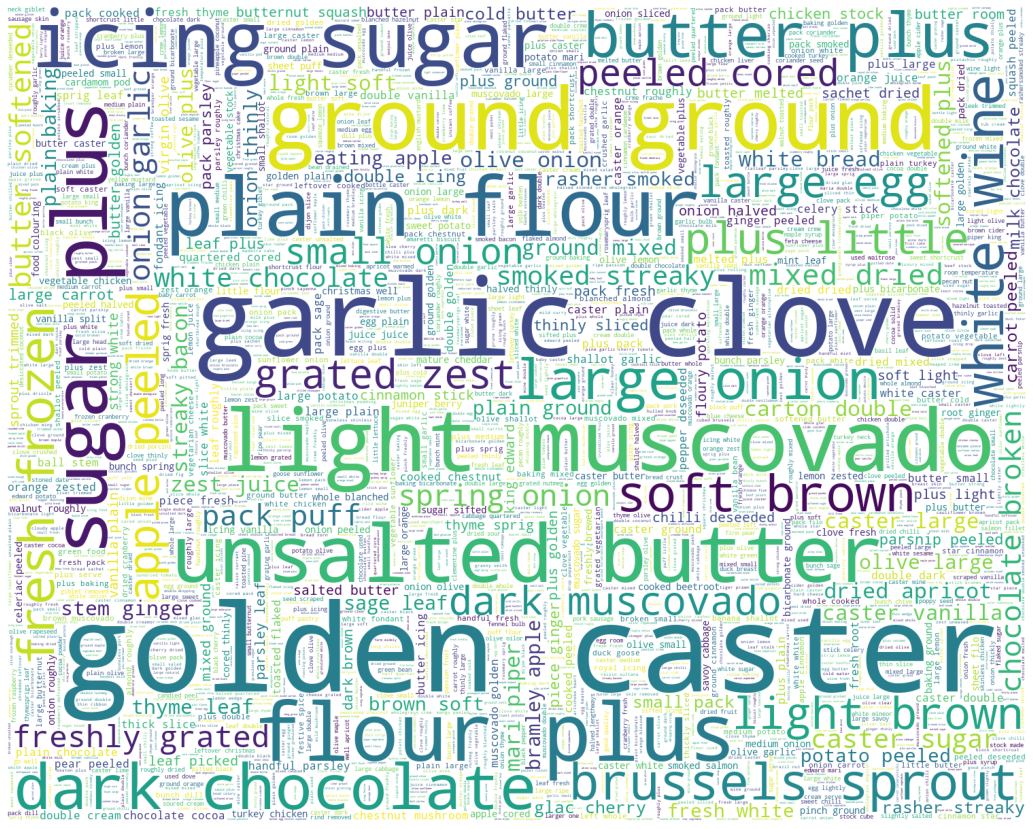

In [37]:
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('recipes_wordcloud.png')